In [2]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style
import matplotlib as mpl
import math

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})



In [2]:
nu= np.random.poisson(100, 10000)
nubar= np.random.poisson(50, 10000)

In [3]:
Ntot=20
trueA=np.linspace(-1,1,20)
trueNbar=(Ntot-trueA*Ntot)/2
trueN=Ntot-trueNbar
stdDevArray=[]
meanArray=[]
aArray=[]
sigmaArray=[]
sigmaMeanArray=[]
for tA,n,nbar in zip(trueA,trueN,trueNbar):
    nu= np.random.poisson(n, 10000)
    nubar= np.random.poisson(nbar, 10000)
    A=(nu-nubar)/(nu+nubar)
    sigmaA=np.sqrt((4*nu*nubar*nubar+4*nubar*nu*nu))/(nu+nubar)**2
    stdDevArray.append(np.std(A))
    meanArray.append(np.mean(A))
    aArray.append(A)
    sigmaArray.append(sigmaA)
    sigmaMeanArray.append(np.mean(sigmaA))

Text(0, 0.5, "'Measured' A")

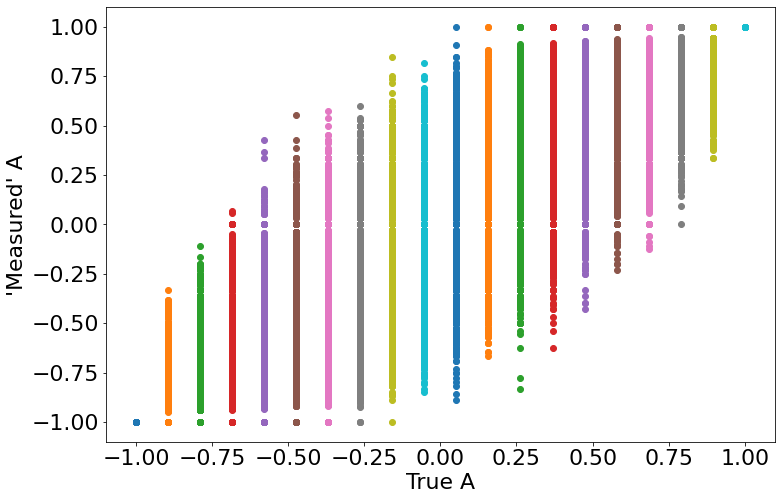

In [4]:
fig, ax = plt.subplots()
#ax.plot(trueA,aArray)
for xe, ye in zip(trueA, aArray):
    ax.scatter([xe] * len(ye), ye)
ax.set_xlabel("True A")
ax.set_ylabel("'Measured' A")

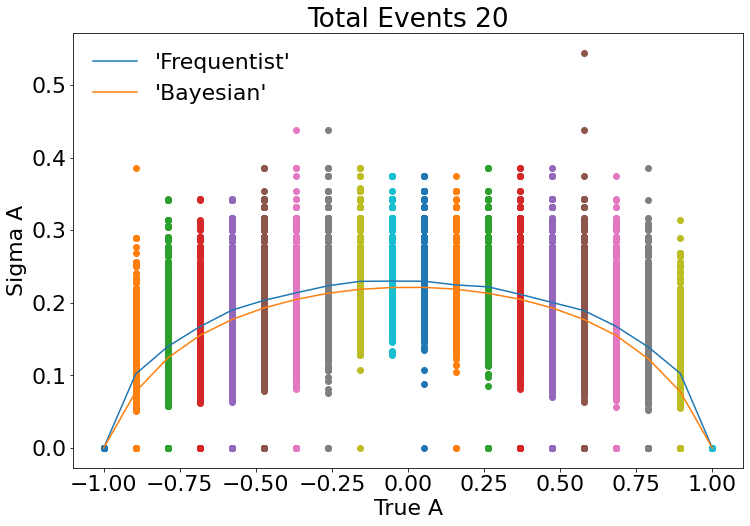

In [5]:
fig, ax = plt.subplots()
#ax.plot(trueA,aArray)
for xe, ye in zip(trueA, sigmaArray):
    ax.scatter([xe] * len(ye), ye)
ax.plot(trueA,stdDevArray,label="'Frequentist'")
ax.plot(trueA,sigmaMeanArray,label="'Bayesian'")
ax.set_xlabel("True A")
ax.set_ylabel("Sigma A")
ax.set_title("Total Events "+str(Ntot))

ax.legend()

0 5 0.0
1 5 0.0
2 5 0.0
3 5 0.0
4 5 0.0
5 5 0.0
6 5 1.0101010101010102
7 5 2.0202020202020203
8 5 3.0303030303030303
9 5 4.040404040404041


Text(0, 0.5, '$\\mathcal{R}$')

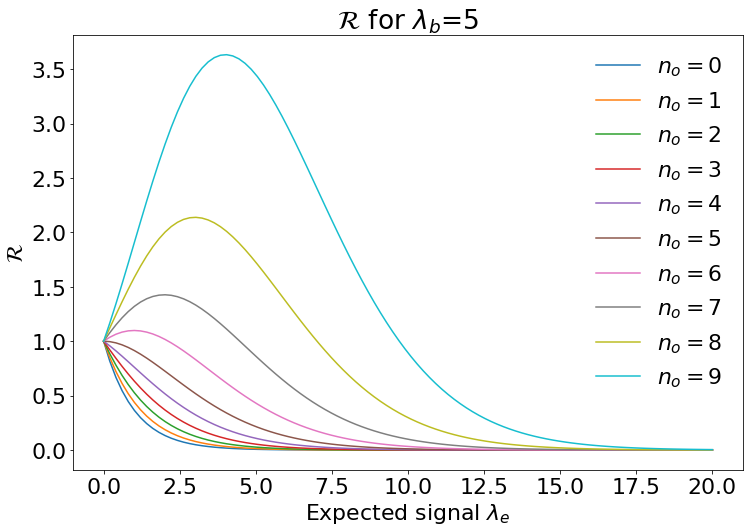

In [21]:
def R(ns,nb,no):
    return np.exp(-ns) * (1 + ns/nb)**no
fig, ax = plt.subplots()
ns=np.linspace(0,20,100)
nb=5
for no in range(10):
    ax.plot(ns,R(ns,nb,no),label="$n_o=$"+str(no))
    print(no,nb,ns[np.argmax(R(ns,nb,no))])
ax.legend()
ax.set_xlabel("Expected signal $\lambda_e$")
ax.set_title("$\mathcal{R}$ for $\lambda_b$="+str(nb))
ax.set_ylabel(r"$\mathcal{R}$")
